# Pre-Processing Techniques

## Imports

In [11]:
# CONSTANT Variables
files = ['Data/Plasma/ADNI_BLENNOWPLASMANFLLONG_10_03_18_12Feb2024.csv', 'Data/Plasma/UGOTPTAU181_06_18_20_27Nov2023.csv']

fields_needed = ['RID', 'VISCODE2', 'PLASMA_NFL', 'PLASMAPTAU181'] # Fields needed after the merge

display1 = ['PLASMA_NFL', 'PLASMAPTAU181'] # These should be the biomarker values
display2 = ['MMSE', 'PTEDUCAT', 'AGE'] # This should be the Non-Blood values, such as MMSE etc.

output_file_path = "File3/"

In [12]:
#TODO: Deal with NULL values
%reload_ext autoreload
%autoreload 2
import pandas as pd
from PreProcessingPy import pp

## Read the Relevant Dataframes and Merge

In [13]:
# Read the dfs
preprocessor = pp(files, ['RID', 'VISCODE2'], fields_needed)

# Create the AB42/AB40 value
preprocessor.df


,RID,VISCODE2,PLASMA_NFL,PLASMAPTAU181
0,2,m60,25.3,11.939
1,2,m72,30.9,12.936
2,2,m84,34.1,13.563
3,2,m96,35.3,15.506
4,8,m60,196.3,18.305
...,...,...,...,...
3850,5294,bl,21.2,7.085
3851,5295,bl,16.4,10.932
3852,5295,m24,14.1,9.335
3853,5296,bl,21.4,4.045


In [14]:
preprocessor.df.rename(columns={"VISCODE2":"VISCODE"}, inplace=True) # Data in the class is based on VISCODE
preprocessor.add_adni_merge_data(['RID', 'DX', 'VISCODE', 'PLASMA_NFL', 'PLASMAPTAU181', 'MMSE', 'PTEDUCAT', 'AGE'])
preprocessor.df

d:\Git\NoMoreAlzheimersDisease\PreProcessingPy.py:56: DtypeWarning: Columns (20,105) have mixed types. Specify dtype option on import or set low_memory=False.
  am = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')


,RID,DX,VISCODE,PLASMA_NFL,PLASMAPTAU181,MMSE,PTEDUCAT,AGE
0,2,CN,m60,25.3,11.939,28.0,16,74.3
1,2,CN,m72,30.9,12.936,23.0,16,74.3
2,2,MCI,m84,34.1,13.563,24.0,16,74.3
3,2,CN,m96,35.3,15.506,25.0,16,74.3
4,8,CN,m60,196.3,18.305,28.0,18,84.5
...,...,...,...,...,...,...,...,...
3842,5294,CN,bl,21.2,7.085,30.0,18,68.5
3843,5295,CN,bl,16.4,10.932,29.0,15,75.5
3844,5295,CN,m24,14.1,9.335,26.0,15,75.5
3845,5296,CN,bl,21.4,4.045,29.0,14,69.3


## Rename Fields

In [15]:
# Rename to be more intuitive for rest of detection
preprocessor.clean_data()
preprocessor.df

,RID,DX,VISCODE,PLASMA_NFL,PLASMAPTAU181,MMSE,PTEDUCAT,AGE
0,2,SCD,m60,25.3,11.939,28.0,16,74.3
1,2,SCD,m72,30.9,12.936,23.0,16,74.3
2,2,MCI,m84,34.1,13.563,24.0,16,74.3
3,2,SCD,m96,35.3,15.506,25.0,16,74.3
4,8,SCD,m60,196.3,18.305,28.0,18,84.5
...,...,...,...,...,...,...,...,...
3842,5294,SCD,bl,21.2,7.085,30.0,18,68.5
3843,5295,SCD,bl,16.4,10.932,29.0,15,75.5
3844,5295,SCD,m24,14.1,9.335,26.0,15,75.5
3845,5296,SCD,bl,21.4,4.045,29.0,14,69.3


## Plot the data

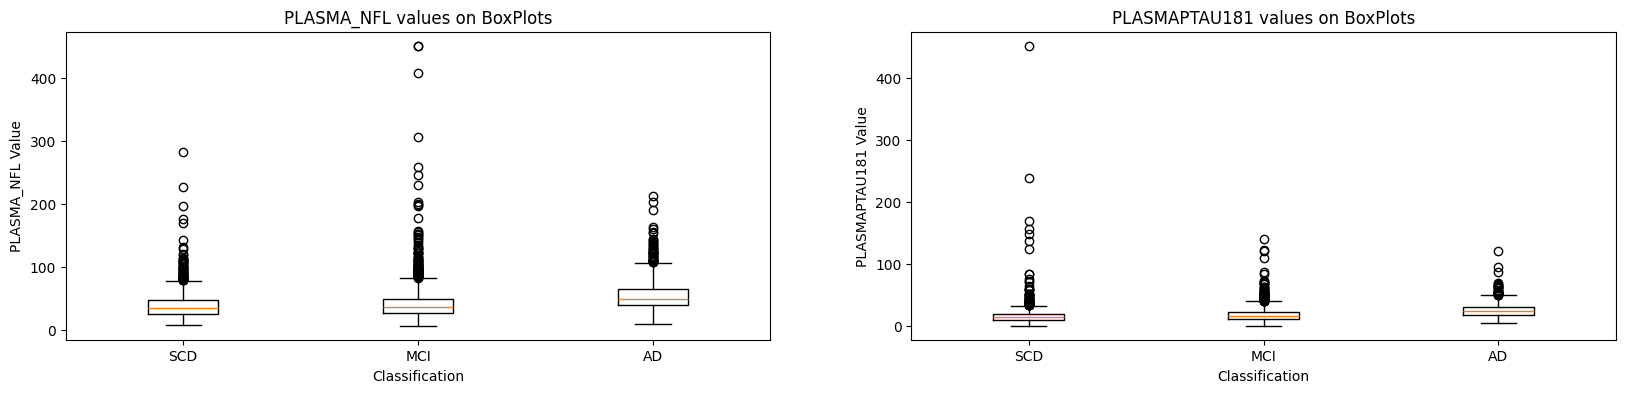

In [16]:
from PreProcessingPy import visual_display
vd = visual_display(preprocessor.df)

vd.display(display1)

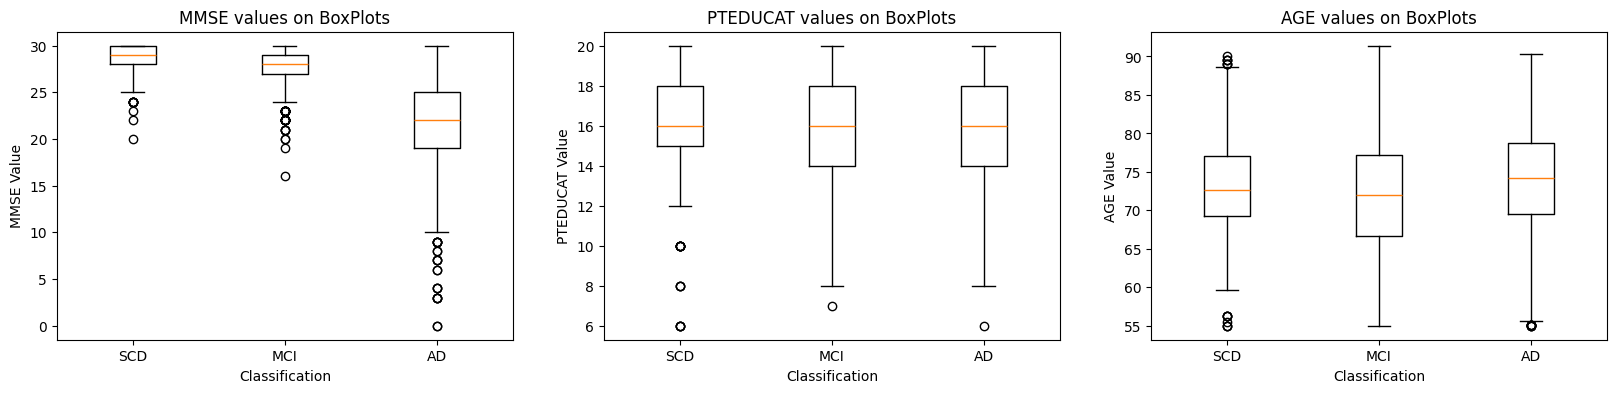

In [17]:
vd.display(display2)

In [18]:
# Write this to the Data file
preprocessor.write_to_csv(output_file_path + '/UnCleanData/data.csv')

## Identify Outliers

In [19]:
# SOURCE :: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#:~:text=Use%20Inter%2DQuartile%20Range%20(IQR,percentile%20of%20the%20dataset%2C%20respectively.

preprocessor.remove_outliers(display1)

[4, 5, 2570, 13, 528, 2068, 3607, 537, 538, 539, 547, 552, 554, 2605, 55, 56, 58, 3139, 2632, 2633, 2635, 2636, 77, 2638, 2639, 79, 3662, 3678, 1634, 1635, 1636, 1637, 3686, 112, 114, 1655, 3703, 140, 141, 664, 156, 157, 158, 670, 160, 1701, 678, 692, 3767, 2238, 2239, 2242, 3782, 2764, 3789, 220, 222, 236, 2287, 3839, 2325, 280, 1817, 1818, 1819, 1820, 2346, 312, 828, 829, 1869, 1870, 1871, 347, 348, 349, 350, 2911, 865, 2412, 2927, 1911, 1912, 2436, 3468, 910, 912, 913, 2971, 2973, 414, 415, 416, 2979, 2483, 446, 959, 502, 503, 504, 505, 510]


### Display the Filtered Data

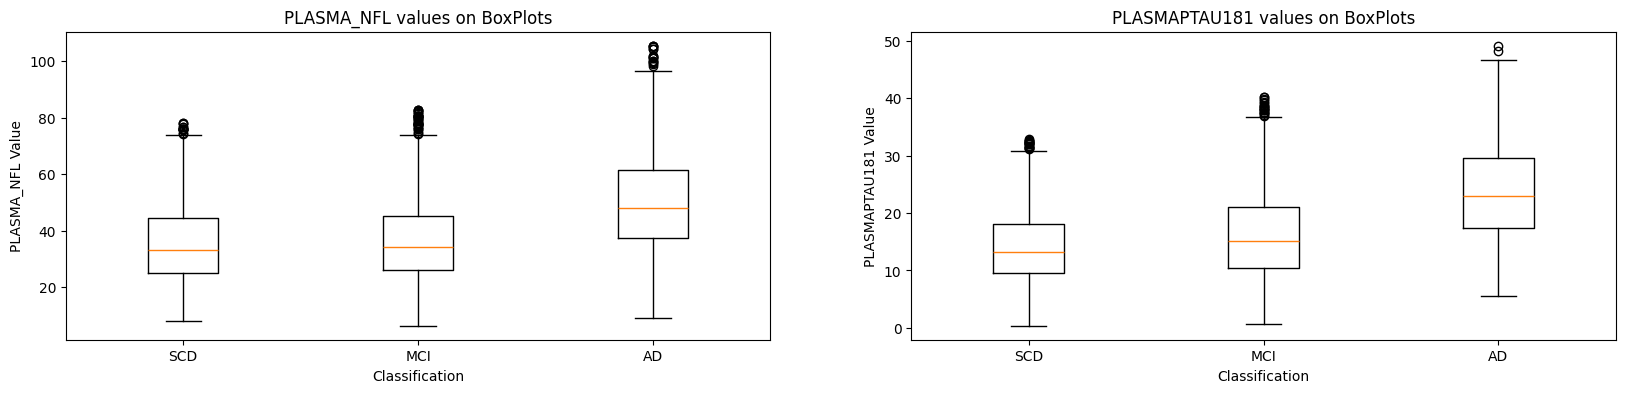

In [20]:
vd = visual_display(preprocessor.df)
vd.display(display1)

In [21]:
# Write this to a data file (with the outliers removed)
preprocessor.write_to_csv(output_file_path + 'CleanedData/data.csv')

## SMOTE Oversampling

In [22]:
preprocessor.use_SMOTE() # Needs to remove the RID, VISCODE Values (Shouldn't be needed)
preprocessor.df

,PLASMA_NFL,PLASMAPTAU181,MMSE,PTEDUCAT,AGE,DX
0,25.3,11.939,28.0,16.0,74.3,SCD
1,30.9,12.936,23.0,16.0,74.3,SCD
2,35.3,15.506,25.0,16.0,74.3,SCD
3,76.9,21.625,30.0,18.0,84.5,SCD
4,71.4,17.628,28.0,18.0,84.5,SCD
...,...,...,...,...,...,...
5095,15.10747,11.520808,29.78506,14.429881,67.836434,SCD
5096,35.522042,11.558577,30.0,17.968817,70.249893,SCD
5097,39.516415,24.179347,30.0,16.524528,71.906604,SCD
5098,36.179196,6.84834,30.0,20.0,75.5,SCD


## Analysis of the SMOTE Data

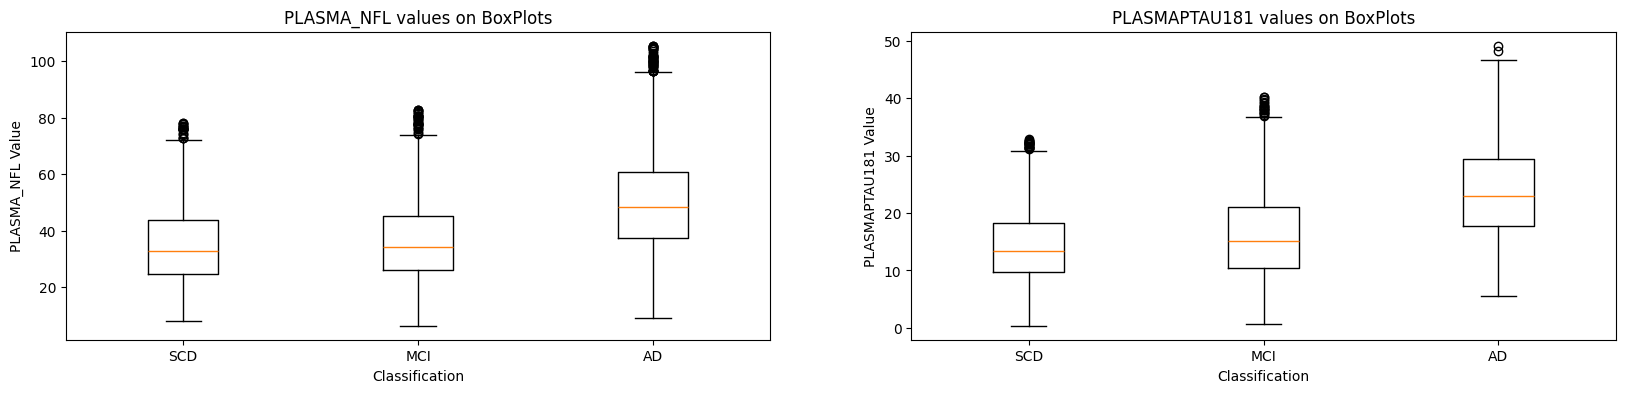

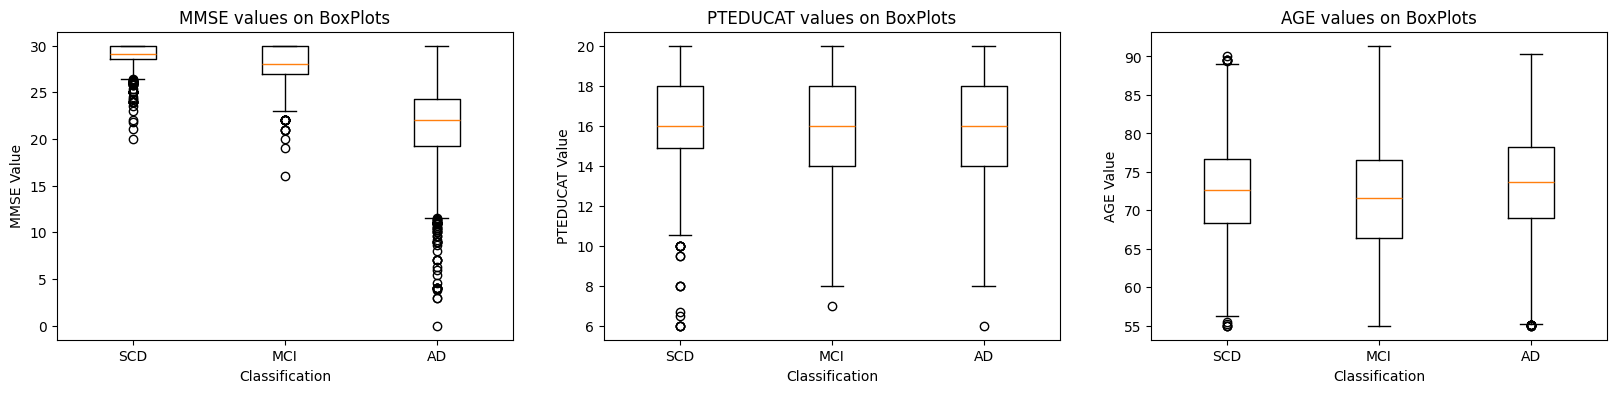

In [23]:
vd = visual_display(preprocessor.df)
vd.display(display1)
vd.display(display2)

In [24]:
preprocessor.write_to_csv(output_file_path + 'SMOTEData/data.csv')

## Effects of Pre-Processing in terms of Class Sizes

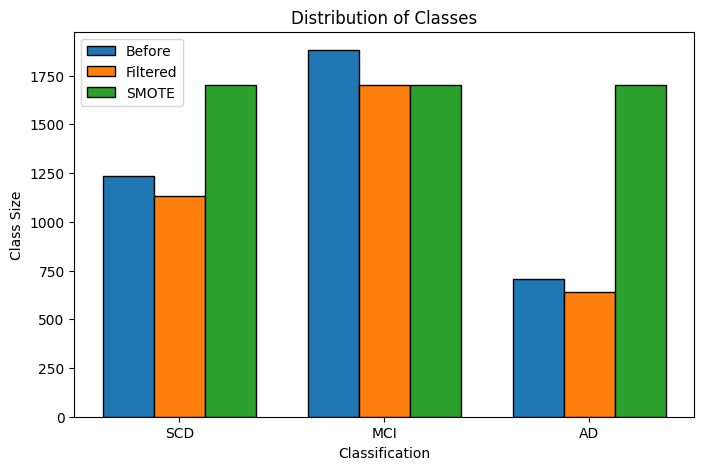

In [26]:
from PreProcessingPy import post_processing_display
# Compare Sizes of the data throughout processing
display = post_processing_display("File3")
display.display_results()